In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
'''Utilizei os seguintes talhões para tentar predizer a produtividade:  607_3; 605_7; 606_6; 605_2
    Os demais usei para ajustar o algoritimo '''
df1= pd.read_csv('train_test.csv')
df2= pd.read_csv('valid.csv')

In [76]:
df1.head()

,talhao,wkt_geom,fid,lat,long,produtivid,diametro,frutos_col,frutos_ver,total_frut,...,Banda_NIR1,GNDVI1,Horas_Sol1,EVI1,IAF1,GLI1,Declividad,Altitude1,dens_folia,Porta_enxerto
0,605_3,Point (-49.41878676000000326 -22.8055486400000...,1368,-22.805549,-49.418787,51.677315,0.000000,2.800000,0.066667,2.733333,...,3320.737061,0.663,12.5,1.119,-12064868,52.696999,5.878250,627,0.897087,0
1,605_3,Point (-49.41887162999999816 -22.8054965199999...,1369,-22.805497,-49.418872,55.591431,65.741608,35.266667,6.266667,40.866667,...,3360.666992,0.689,12.5,1.248,-10997548,64.803001,4.044691,628,0.866524,0
2,605_3,Point (-49.41902774999999792 -22.8055066500000...,1370,-22.805507,-49.419028,67.753815,64.966526,58.733333,6.466667,64.733333,...,3314.833008,0.738,12.5,1.546,-8429112,109.375000,4.124518,627,0.891191,0
3,605_3,Point (-49.41917974999999785 -22.8055011699999...,1371,-22.805501,-49.419180,82.992264,65.704237,56.400000,7.866667,63.466667,...,3392.375000,0.742,12.5,1.609,-8635240,140.345993,4.124518,626,0.889299,0
4,605_3,Point (-49.41932995999999889 -22.8054777800000...,1372,-22.805478,-49.419330,86.415337,66.784635,42.133333,5.400000,46.333333,...,3321.571045,0.748,12.5,1.561,-9313600,137.647995,4.124518,625,0.866400,0


In [77]:
df1.describe()

,fid,lat,long,produtivid,diametro,frutos_col,frutos_ver,total_frut,NDVI1,Banda_red1,...,Banda_NIR1,GNDVI1,Horas_Sol1,EVI1,IAF1,GLI1,Declividad,Altitude1,dens_folia,Porta_enxerto
count,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,...,7250.000000,7250.000000,7250.000000,7250.000000,7.250000e+03,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000
mean,4662.657655,-22.797643,-49.428270,31.441751,60.757390,18.582529,13.681545,31.424717,0.761955,541.485814,...,3298.466621,0.718184,12.240207,1.728726,-9.285878e+06,108.525342,4.826721,576.601517,0.906577,0.261379
std,2754.263151,0.005002,0.009163,18.766982,9.824375,10.880692,7.609888,12.586105,0.076637,143.097625,...,307.689888,0.027189,0.293849,0.281454,4.583543e+06,34.094006,2.352462,49.349290,0.032844,0.439416
min,1.000000,-22.806107,-49.443951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.562000,11.500000,0.000000,-3.299794e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2238.250000,-22.801518,-49.436274,16.839931,56.758859,10.266667,8.200000,22.933333,0.710000,433.868256,...,3042.098022,0.707000,12.000000,1.516000,-1.132818e+07,87.332752,3.237688,553.000000,0.894037,0.000000
50%,4665.500000,-22.798884,-49.430687,28.238318,62.925485,16.733333,12.466667,31.466667,0.776000,499.251007,...,3321.695068,0.725000,12.500000,1.766000,-8.190538e+06,109.500000,4.573921,567.000000,0.908468,0.000000
75%,6867.750000,-22.794595,-49.418937,43.063474,66.623631,25.066667,18.266667,39.800000,0.828000,615.774765,...,3545.299744,0.737000,12.500000,1.981000,-6.192016e+06,131.944756,6.454830,610.000000,0.923477,1.000000
max,9212.000000,-22.785569,-49.411512,95.715973,100.403748,68.133333,48.666667,79.466667,0.879000,1351.239990,...,4233.972168,0.776000,13.000000,2.195000,0.000000e+00,196.300003,13.873369,648.000000,0.963966,1.000000


In [78]:
from sklearn.model_selection import train_test_split
X = df1.drop(['fid', 'lat', 'long', 'talhao', 'wkt_geom','Altitude1', 'produtivid' ], axis= 1)
y= df1['produtivid']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [79]:
from sklearn.ensemble import RandomForestRegressor
rfr =RandomForestRegressor(min_samples_leaf=30, n_estimators=1000, n_jobs=-1, random_state= 42)
rfr.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=30, n_estimators=1000, n_jobs=-1,
                      random_state=42)

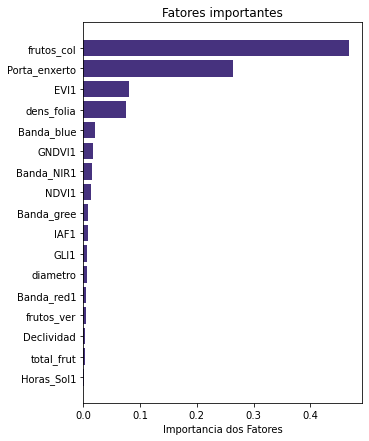

In [80]:
feat_list = X.columns.values
feat_imp = rfr.feature_importances_
sort_idx = np.argsort(feat_imp)

plt.figure(figsize=(5,7))
plt.barh(range(len(sort_idx)),feat_imp[sort_idx], align = 'center')
plt.yticks(range(len(sort_idx)),feat_list[sort_idx])
plt.xlabel('Importancia dos Fatores')
plt.title('Fatores importantes')
plt.draw()
plt.show()

In [81]:
y_pred = rfr.predict(df2.drop(['produtivid','fid', 'lat', 'long', 'talhao', 'wkt_geom','Altitude1'], axis = 1))

In [148]:
from sklearn import metrics
from sklearn.metrics import r2_score
mae =( metrics.mean_absolute_error(df2['produtivid'], y_pred))
rmse =( np.sqrt(metrics.mean_squared_log_error(df2['produtivid'], y_pred)))
r2= ( r2_score(df2['produtivid'], y_pred))
print(f'Para o modelo: MAE = {mae}, RMSE = {rmse}, R² = {r2}')

Para o modelo: MAE = 9.327590230876114, RMSE = 0.32057897581741746, R² = 0.6951961846651339


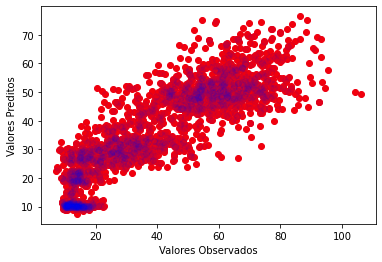

In [157]:
plt.scatter(df2['produtivid'], y_pred, color = 'red', alpha=1, label = 'y_test')
plt.scatter(df2['produtivid'], y_pred, color = 'blue', alpha=0.05, label = 'y_pred')


plt.xlabel('Valores Observados')
plt.ylabel('Valores Preditos')

plt.show()

In [89]:
print(y_pred)

[22.88823424 25.78516556 34.92076739 ... 48.13044676 53.12810649
 52.9273133 ]


In [90]:
df2['Prod_pred'] = y_pred
df2.to_csv('valid.csv', index=False)

In [86]:
df2.head()
df2.describe()

,fid,lat,long,produtivid,diametro,frutos_col,frutos_ver,total_frut,NDVI1,Banda_red1,...,GNDVI1,Horas_Sol1,EVI1,IAF1,GLI1,Declividad,Altitude1,dens_folia,Porta_enxerto,Prod_pred
count,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,...,1962.000000,1962.000000,1962.000000,1.962000e+03,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000
mean,4398.985729,-22.799475,-49.427992,40.753432,61.323777,20.628950,13.511553,33.497689,0.746006,542.510494,...,0.725443,12.334862,1.671587,-9.896930e+06,105.842049,4.791992,585.156983,0.918780,0.198777,37.318770
std,2263.483157,0.003440,0.007082,22.135134,10.456127,12.127526,6.455632,13.154836,0.078662,140.825032,...,0.029286,0.283846,0.293359,4.163868e+06,27.836121,2.491102,45.097004,0.027136,0.399181,16.198319
min,943.000000,-22.804415,-49.438634,7.222481,0.000000,0.066667,0.000000,0.000000,0.431000,365.100006,...,0.560000,11.000000,0.640000,-2.997893e+07,0.000000,0.000000,0.000000,0.000000,0.000000,7.421637
25%,3214.250000,-22.801927,-49.435148,18.852420,58.718902,11.333333,9.066667,25.200000,0.697000,442.566254,...,0.716000,12.000000,1.474000,-1.184443e+07,91.347502,2.918995,560.000000,0.910046,0.000000,26.032867
50%,3704.500000,-22.800698,-49.424051,39.961823,63.725579,17.400000,13.333333,33.066667,0.736000,514.816498,...,0.732000,12.500000,1.617000,-9.420937e+06,109.649498,4.573921,601.000000,0.921498,0.000000,38.010555
75%,7107.750000,-22.795593,-49.421537,59.635206,66.894998,28.650000,17.933333,41.600000,0.823000,590.928497,...,0.745000,12.500000,1.963000,-6.292591e+06,124.678001,6.302977,612.000000,0.931169,0.000000,50.286725
max,7598.000000,-22.792348,-49.417319,105.970055,87.651100,63.600000,37.866667,79.800000,0.864000,1487.880005,...,0.769000,13.000000,2.161000,-4.336292e+06,174.968002,14.196947,633.000000,0.963216,1.000000,76.500456


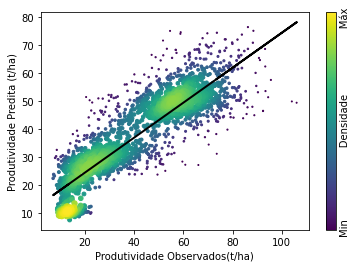

Para o modelo: MAE = 9.3276, RMSE = 0.3206, R² = 0.6952


In [159]:
x = df2['produtivid']
y = y_pred

xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)


idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

sizes = np.linspace(1, 30, len(x))

plt.scatter(x, y, c=z, s=sizes)

coefficients = np.polyfit(x, y, 1)
poly_function = np.poly1d(coefficients)
plt.plot(x, poly_function(x), color='black', linewidth=2, label='Regression Line')

cb = plt.colorbar()
cb.set_ticks([0, 0.5, 1])  
cb.set_ticklabels(['0', '0.5', '1']) 
cb.set_label('Min                       Densidade                     Máx')

plt.xlabel('Produtividade Observados(t/ha)')
plt.ylabel('Produtividade Predita (t/ha)')

plt.show()
mae =( metrics.mean_absolute_error(df2['produtivid'], y_pred))
rmse =( np.sqrt(metrics.mean_squared_log_error(df2['produtivid'], y_pred)))
r2= ( r2_score(df2['produtivid'], y_pred))
print(f'Para o modelo: MAE = {mae:.4f}, RMSE = {rmse:.4f}, R² = {r2:.4f}')